In [1]:
import numpy as np
import pandas as pd
import math as m
import sympy as sym
import random as rand
import matplotlib.pyplot as plt
import Functions_module_beta as fn
import custom_functions_01 as cf
from custom_functions_01 import Four_list
from custom_functions_01 import avg_prob_with_confidence
from custom_functions_01 import avg_prob_with_confidence_alternative
from Functions_module_beta import SystemAction
from custom_functions_GD import Gradient_modified
from custom_functions_GD import GDSearch_modified


# from Functions_module_beta import AvgProbability

In [2]:
# defining gradient function
# priors_list = [.25,.25,.25,.25]
def Gradient_modified(splitters, c = 1, quantity = 'avgprob' , angle_theta = 45,  delta = .001, machine_precision = .001 , priors_list = [.25,.25,.25,.25]):
    [a,b,c,d,e,f] = [i for i in splitters]

    # print([a,b,c,d,e,f],splitters)
    

    initial_avg_prob = avg_prob_with_confidence_alternative(confidence = c, quantity= quantity , custom_splitters= splitters, index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)

    partial_a = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a+delta,b,c,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_b = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b+delta,c,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_c = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b,c+delta,d,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_d = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b,c,d+delta,e,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_e = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b,c,d,e+delta,f], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta
    partial_f = (avg_prob_with_confidence_alternative(confidence = c, quantity= quantity,  custom_splitters= [a,b,c,d,e,f+delta], index_15k= False, index_729= False, theta = angle_theta, four_list_compared= False, raw_four_list= False, machine_uncertainty = machine_precision, priors = priors_list)- initial_avg_prob)/delta

    Gradient = [partial_a,partial_b,partial_c,partial_d,partial_e,partial_f]
    return Gradient


In [3]:
# Defining Gradient search function for a given confidence and theta values.
def GDSearch_modified(starting_point = [0,0,0,0,0,0], quantity = 'avgprob' , c_threshold = 1, theta = 45, iterations = 25, step = .01, calculations = False, calc_precision = .0001 , priors = [.25,.25,.25,.25], deriv_delta = .0001, double_deriv_method = False, random_step = False, adaptive_step = True ):
    new_splitters = starting_point 
    
    for i in range(iterations):
        grad = Gradient_modified(splitters = new_splitters, quantity= quantity, c = c_threshold, angle_theta = theta, machine_precision = calc_precision , priors_list = priors, delta = deriv_delta)
        
        # if random_step == True and [abs(i) < 1e-6 for i in grad]:
        #     index_choice = np.random.choice(6)
        #     new_splitters[index_choice] += -(0.1)

        # if double_deriv_method == True and [abs(i) < 1e-6 for i in grad]:    # the double deriv clause
        #     double_deriv = Double_deriv(splitters = [m1,m2,m3,m4,m5,m6], c = c_threshold, angle_theta = theta, machine_precision = calc_precision , priors_list = priors, delta = deriv_delta)
        #     # above gives the six double derivateives. We can use these to decide which direction to make a large move in.
        #     if [abs(i) < 1e-6 for i in double_deriv]:
        #         new_splitters = [(new_splitters[i]+ (10*step)) for i in range(6)]
        #     else:
        #         new_splitters = [(new_splitters[i]+ (10*step)*double_deriv[i]) for i in range(6)]
        
        # if double_deriv_method == False and random_step == False:
        if adaptive_step != False:
            new_splitters = [(new_splitters[i]- step*(m.copysign(1,grad[i]))) for i in range(6)]        # the copysign thing is just finding the sign.
        else:
            new_splitters = [(new_splitters[i]+ step*grad[i]) for i in range(6)]                    # adaptive rate - step depends on gradient size

# possible ways to reduce calculations  - 

        if calculations == True:        # if need to analyze, shows intermediate steps
            print(f"\n gradient = {grad}")
            # if double_deriv_method == True:
            #     print(f"double_derivatives_list = {double_deriv}")
            print(f"Splitter_{i}= {new_splitters}")
            print(f"{quantity}{i}= {avg_prob_with_confidence_alternative(custom_splitters = new_splitters, quantity = quantity , confidence= c_threshold, index_15k= False, index_729= False, theta=theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)}")

    max_quant_splitters = new_splitters
    max_quant = avg_prob_with_confidence_alternative(custom_splitters = new_splitters, quantity = quantity , confidence= c_threshold, index_15k= False, index_729= False, theta= theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)

    if calculations == True : print(f'\n starting_point = {starting_point}')      # to compare starting and final points
    if calculations == True :  # for showing intermediate steps
        starting_quant = avg_prob_with_confidence_alternative(custom_splitters = starting_point, quantity = quantity , confidence= c_threshold, index_15k= False, index_729= False, theta=theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)
        final_quant    = avg_prob_with_confidence_alternative(custom_splitters = max_quant_splitters, quantity = quantity , confidence= c_threshold, index_15k= False, index_729= False, theta=theta, four_list_compared= False, raw_four_list= False, machine_uncertainty= calc_precision, priors= priors)
        if final_quant != 0: 
            fractioanl_increase = 100*(final_quant- starting_quant)/final_quant       # not actually percent increaswe coz dividing by the final prob instead of starting prob.
        else:
            fractioanl_increase = 'None (Division by zero)'       # not actually percent increaswe coz dividing by the final prob instead of starting prob.
        print(f"starting {quantity} = {starting_quant}, result max {quantity} = {final_quant}, percent increase = {fractioanl_increase}")

    return [max_quant, max_quant_splitters]       # the resultant maximum probability and the corresponding splitters
        

# maybe add double derivatives inside if condition- in case its already a minima point with first deriv = 0. 

In [4]:
# Some saved data etc: 

s = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0]   # optimal splitters

s_02 = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+.2,0]   # optimal splitters + some deviation = starting point for GD 

s_03 = [m.pi/2,0,m.pi/4,m.pi/4+.2,m.pi/2,0]   

s_04 = [m.pi/2,0,m.pi/4+.2,m.pi/4,m.pi/2,0]   

s_05 = [m.pi/2,0+.2,m.pi/4,m.pi/4,m.pi/2,0]   # different devitations

s_06 = [m.pi/2+.2,0,m.pi/4+.2,m.pi/4,m.pi/2,0]   

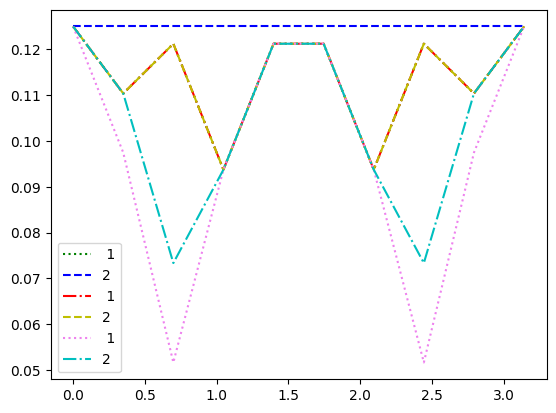

In [5]:
#checking if our fucntion with maxconf quantity gives expected values

# print(avg_prob_with_confidence_alternative( custom_splitters = s , quantity= 'maxconf', theta= 45))   # works

conf_list1 = []
conf_list2 = []
conf_list3 = []
conf_list4 = []
conf_list5 = []
conf_list6 = []
conf_list7 = []

X = np.linspace(0,m.pi,10)
for i in X:
    sp1 = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2,0+i]   # Increasing one parameter at once 
    conf_list1.append(avg_prob_with_confidence_alternative(custom_splitters = sp1 , quantity= 'maxconf', theta= 45))
    sp2 = [m.pi/2,0,m.pi/4,m.pi/4,m.pi/2+i,0]
    conf_list2.append(avg_prob_with_confidence_alternative(custom_splitters = sp2 , quantity= 'maxconf', theta= 45))
    sp3 = [m.pi/2,0,m.pi/4,m.pi/4+i,m.pi/2,0]
    conf_list3.append(avg_prob_with_confidence_alternative(custom_splitters = sp3 , quantity= 'maxconf', theta= 45))
    sp4 = [m.pi/2,0,m.pi/4+i,m.pi/4,m.pi/2,0]
    conf_list4.append(avg_prob_with_confidence_alternative(custom_splitters = sp4 , quantity= 'maxconf', theta= 45))
    sp5 = [m.pi/2,0+i,m.pi/4,m.pi/4,m.pi/2,0]
    conf_list5.append(avg_prob_with_confidence_alternative(custom_splitters = sp5 , quantity= 'maxconf', theta= 45))
    sp6 = [m.pi/2+i,0,m.pi/4,m.pi/4,m.pi/2,0]
    conf_list6.append(avg_prob_with_confidence_alternative(custom_splitters = sp6 , quantity= 'maxconf', theta= 45))
    sp7 = [m.pi/2+i,0+i,m.pi/4+i,m.pi/4+i,m.pi/2+i,0+i]   # increasing all at once
    conf_list7.append(avg_prob_with_confidence_alternative(custom_splitters = sp7 , quantity= 'maxconf', theta= 45))



# plotting how max confidence looks like
plt.plot(X,conf_list1, linestyle = 'dotted',c= 'g',label=' 1')
plt.plot(X,conf_list2, linestyle = 'dashed',c= 'b',label= '2')
plt.plot(X,conf_list3, linestyle = '-.',c= 'r',label=' 1')
plt.plot(X,conf_list4, linestyle = 'dashed',c= 'y',label= '2')
plt.plot(X,conf_list5, linestyle = 'dotted',c= 'violet',label=' 1')
plt.plot(X,conf_list6, linestyle = '-.',c= 'c',label= '2')
plt.legend()
# Q: Why is max confidnece dropping below .1 ? Ans: coz .1 is not the minimum, it is .1/4 = .025 coz of the normalized probability or priors = .25 each.

# as expected. verified 


In [6]:
GDSearch_modified(starting_point = s_04, quantity = 'maxconf' , c_threshold = 1, theta = 45, iterations = 5, step = .1, calculations = True, adaptive_step=False)


 gradient = [0.0, 0.0, -0.04851028000019131, 0.048511259999883816, 0.0, 0.048511259999883816]
Splitter_0= [1.5707963267948966, 0.0, 0.9805471353974291, 0.7902492893974367, 1.5707963267948966, 0.0048511259999883816]
maxconf0= 0.120749995081

 gradient = [0.0, 0.0, -0.045173407500209706, 0.04517425250011309, 0.0, 0.04517425250011309]
Splitter_1= [1.5707963267948966, 0.0, 0.9760297946474081, 0.794766714647448, 1.5707963267948966, 0.00936855124999969]
maxconf1= 0.12134249730625

 gradient = [0.0, 0.0, -0.041800740000069725, 0.041801459999962765, 0.0, 0.041801459999962765]
Splitter_2= [1.5707963267948966, 0.0, 0.9718497206474012, 0.7989468606474442, 1.5707963267948966, 0.013548697249995967]
maxconf2= 0.12185230840224999

 gradient = [0.0, 0.0, -0.03839778249997705, 0.03839838749991609, 0.0, 0.03839838749991609]
Splitter_3= [1.5707963267948966, 0.0, 0.9680099423974035, 0.8027866993974359, 1.5707963267948966, 0.017388535999987575]
maxconf3= 0.12228764211225002

 gradient = [0.0, 0.0, -0.0349

[0.12268031630625,
 [1.5707963267948966,
  0.0,
  0.9645130023973756,
  0.8066333911474283,
  1.5707963267948966,
  0.02123522774997999]]

In [7]:
# showing that the maxconf indeed isn't our quantity for GD
resultant_s04 = [1.5707963267948966, 0 , 0.9201217213973698, 0.8503218691474568, 1.5707963267949103, 0.0649237057500085]       # result after 50 iterations Starting from s_04 With maxconf = .124996
# avg_prob_with_confidence_alternative(custom_splitters = resultant_s04 , quantity= 'maxconf', theta= 45)
avg_prob_with_confidence_alternative(custom_splitters = resultant_s04 , quantity= 'avgprob', theta= 45)                         # this shows that max confidence is not the quantity to do GD on...coz even with high maxconf discrimination is low

0.23290449000200003

In [8]:
# checking everything works correctly especially the sigmoid function
print(avg_prob_with_confidence_alternative(custom_splitters = s, theta = 45, machine_uncertainty= .0001, quantity= 'avgprob'))
print(avg_prob_with_confidence_alternative(custom_splitters = s, theta = 45, machine_uncertainty= .0001, quantity= 'maxconf'))      # individual probability one
print(avg_prob_with_confidence_alternative(custom_splitters = s, theta = 44, machine_uncertainty= .0001, quantity= 'maxconfactual')) # Actual confidences one
print(avg_prob_with_confidence_alternative(custom_splitters = s, theta = 44, machine_uncertainty= .0001, quantity= 'sigmoid'))  # Sigmoid of the individual probability one
sigmoid = lambda x: m.exp(x)/(1 + m.exp(x))
sigmoid(.125-.25)               # gives expected value, The expected being the value from the Individual probability line of this cell Above

0.499998895236
0.124999723809
0.9996954487157008
error in 'quantity' keyword


0.46879062662624377

In [9]:
# Trying to run gradient decent on the actual confidence Metric


In [18]:
# doing with max of individual confidences
GDSearch_modified(starting_point = s_02, quantity = 'maxconfactual' , c_threshold = 1, theta = 45, iterations = 20, step = 1 , calculations = True, adaptive_step= False)


 gradient = [-9.800021572026196e-05, -9.800021572026196e-05, -9.800021572026196e-05, -9.800021572026196e-05, 0.0, 0.0]
Splitter_0= [1.5706983265791763, -9.800021572026196e-05, 0.785300163181728, 0.785300163181728, 1.7707963267948965, 0.0]
maxconfactual0= 0.9999999966124186

 gradient = [-0.0001687960815566214, -1.6304892991314546e-05, -5.590438334479586e-05, -2.9107798393823714e-05, -1.368904989362818e-09, -3.5458213032413255e-05]
Splitter_1= [1.5705295304976197, -0.00011430510871157651, 0.7852442587983832, 0.7852710553833342, 1.7707963254259915, -3.5458213032413255e-05]
maxconfactual1= 0.9999999850380948

 gradient = [9.912834775249735e-05, -0.00029559159675507374, -0.00015659405105949986, -0.00010433357178207814, -6.045164369083977e-09, 4.164182332289101e-06]
Splitter_2= [1.5706286588453722, -0.00040989670546665025, 0.7850876647473237, 0.7851667218115521, 1.7707963193808272, -3.1294030700124154e-05]
maxconfactual2= 0.9999998757517253

 gradient = [-0.0007781910060788988, 0.000576704

[0.787503736072961,
 [0.6520956729191152,
  -0.5054406806592748,
  -0.16816719739982222,
  -3.208526861590184,
  2.0122904754355053,
  -1.9194157969115722]]

In [15]:
# doing with sigmoid of max individual prob
GDSearch_modified(starting_point = s_02, quantity = 'sigmoid_confactual' , c_threshold = 1, theta = 45, iterations = 15, step = 10 , calculations = True, adaptive_step= False)



 gradient = [-2.1353756540776203e-05, -2.1353756540776203e-05, -2.1353756540776203e-05, -2.1353756540776203e-05, 0.0, 0.0]
Splitter_0= [1.5705827892294888, -0.00021353756540776203, 0.7851846258320405, 0.7851846258320405, 1.7707963267948965, 0.0]
sigmoid_confactual0= 0.6791786956354929

 gradient = [-5.970150263046037e-05, 1.8218245800838417e-05, -4.0647831767159914e-05, 1.9779525795016184e-05, -5.413058890013644e-07, 9.40434841112392e-06]
Splitter_1= [1.5699857742031842, -3.135510739937786e-05, 0.7847781475143689, 0.7853824210899907, 1.7707909137360065, 9.40434841112392e-05]
sigmoid_confactual1= 0.6791785030887849

 gradient = [0.00031420484880584354, 0.0002904891904798035, 0.0002156595668711958, 0.0002156595668711958, 0.0, 0.0002053879877284004]
Splitter_2= [1.5731278226912426, 0.002873536797398657, 0.7869347431830809, 0.7875390167587026, 1.7707909137360065, 0.002147923361395243]
sigmoid_confactual2= 0.6791753580731756

 gradient = [0.000599673607437623, -0.000919552952671765, 0.0013

[0.6053343254112702,
 [0.35489277629495497,
  -2.2913034003035904,
  -0.6308687665014867,
  2.289304241512684,
  1.746466428287916,
  6.658622088229205]]